In [1]:
%env KMP_DUPLICATE_LIB_OK=TRUE 
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

# Pull out common plotting settings:
from plot_params import get_plot_params
full_params, half_params = get_plot_params()
plt.rcParams.update(full_params)

env: KMP_DUPLICATE_LIB_OK=TRUE


In [2]:
# Generate an example signal
fs = 5000
t_max = 1
n = int(fs*t_max)

# Build signal
t = np.linspace(0,t_max,n)
dt = t[1]-t[0]


# Define a time-dependent phase function
f_base = 350
df_1 = 10
tau_1 = 0.5
omega_1 = lambda x: f_base + (df_1)*(1-np.exp(-x/tau_1))
amp_1 = lambda x: 1 + 0.5*np.exp(-x/3)


omega_2 = lambda x: 80-2*x
amp_2 = lambda x: 8 - 0.5*np.exp(-x)


mu = lambda x: 1.5 + 2.5*np.exp(-x/(1.5))
#mu = lambda x: 2*x-0.3*x**2
#mu = lambda t: (0.2)*np.sin(t)

# Create data with time-dependent frequency
z_1 = lambda t: amp_1(t)*np.cos(2*np.pi*omega_1(t)*t)
z_2 = lambda t: amp_2(t)*np.cos(2*np.pi*omega_2(t)*t) 

z = z_1(t) 
z += z_2(t)
z += mu(t)
#z = z/np.std(z)


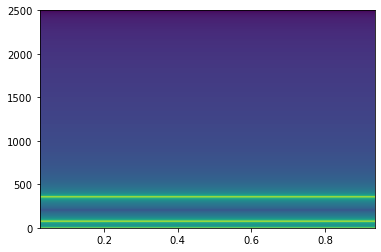

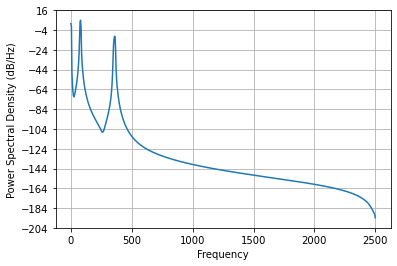

In [3]:
stft = plt.specgram(z, NFFT=4800, Fs=fs, noverlap=256)
plt.figure()
psd = plt.psd(z, NFFT=1200, Fs=fs)

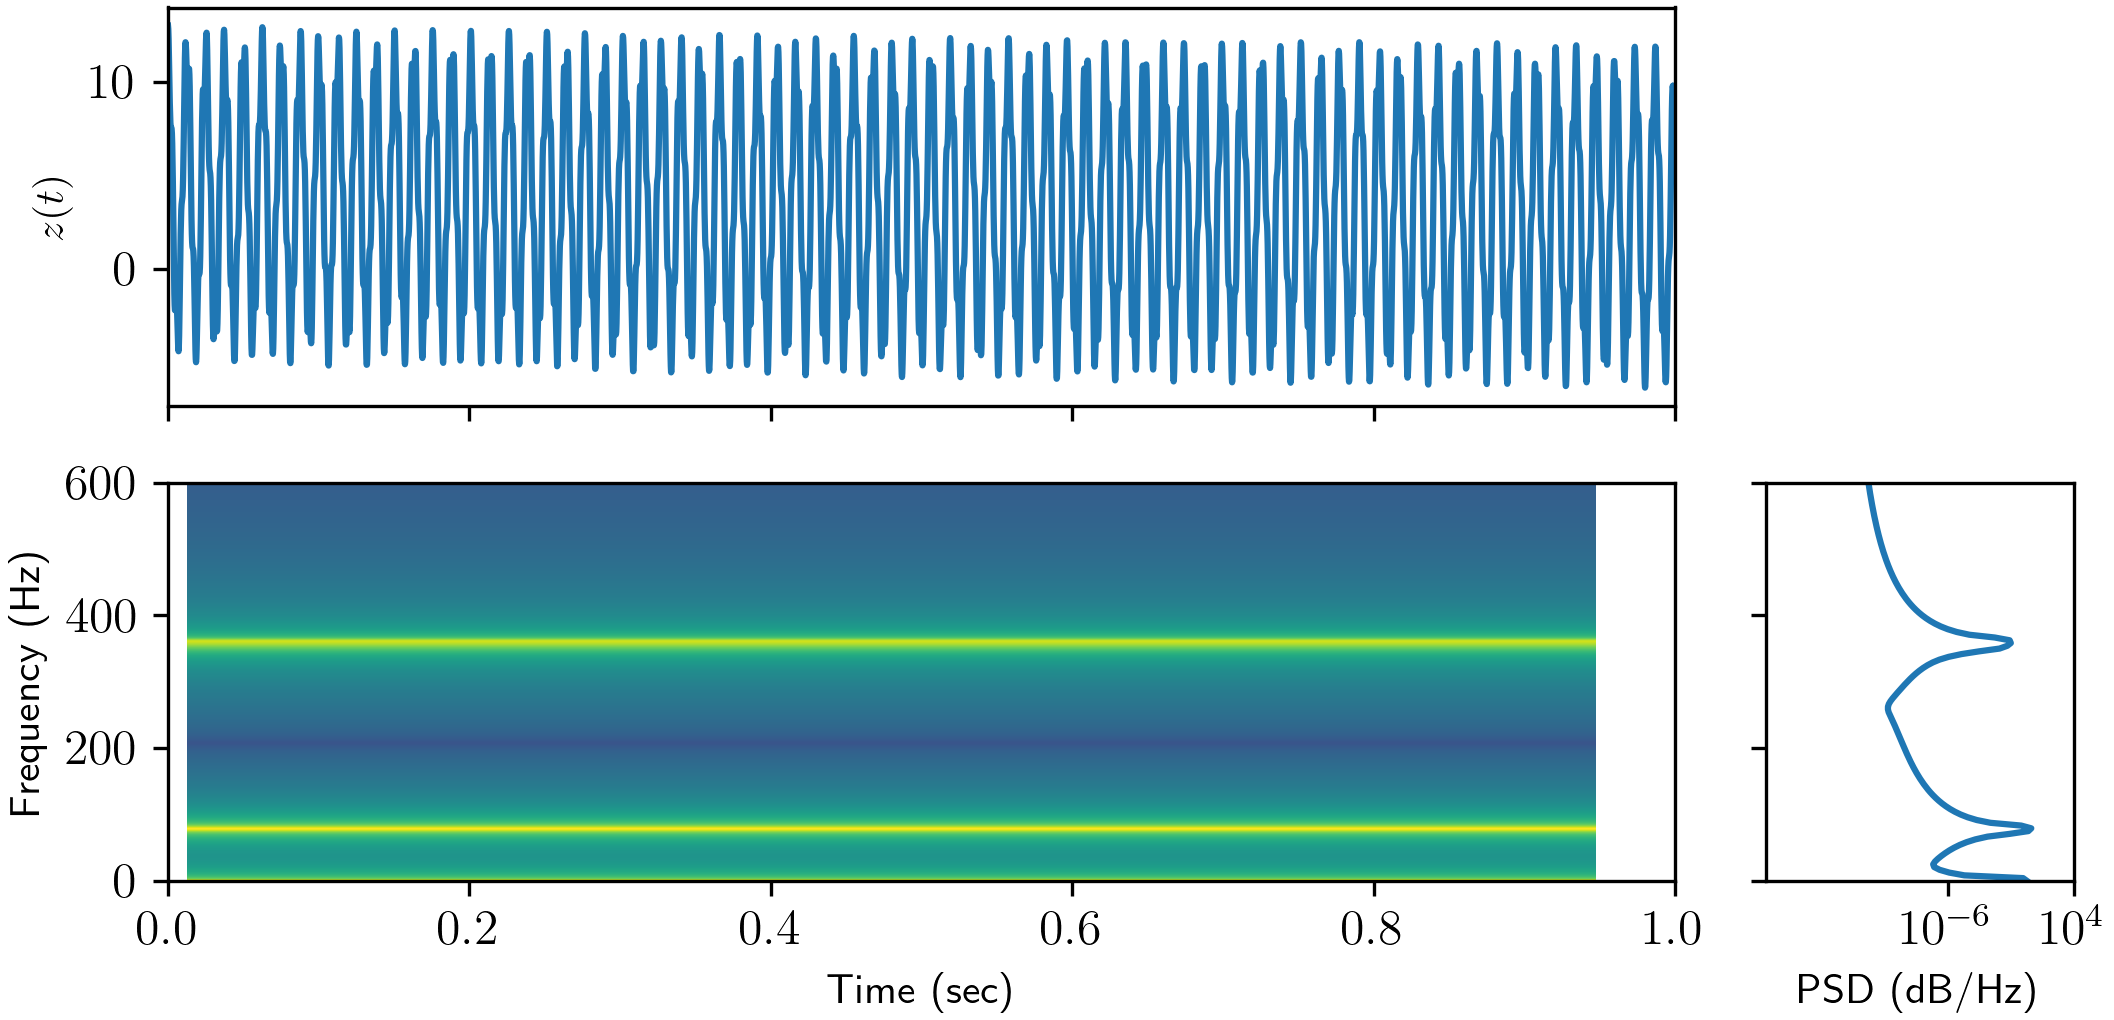

In [4]:
fig3 = plt.figure()
gs = fig3.add_gridspec(2, 5)


#################################
## Axes 1 -- Top Row -- Signal ##
#################################
ax1 = fig3.add_subplot(gs[0, :4])
ax1.plot(t, z)
ax1.set_ylabel('$z(t)$')
#ax1.set_xlabel('Time (sec)')

###############################
## Axes 2 -- Bottom Row STFT ##
###############################
ax2 = fig3.add_subplot(gs[1, :4], sharex=ax1)
#stft = plt.specgram(z, NFFT=4800, Fs=fs, noverlap=256)
stft = plt.specgram(z, NFFT=4800, Fs=fs)
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('Time (sec)')

##############################
## Axes 3 -- Bottom Row PSD ##
##############################
ax3 = fig3.add_subplot(gs[1, 4:], sharey=ax2)
ax3.semilogx(psd[0], psd[1])
ax3.set_xlabel('PSD (dB/Hz)')
#ax3.set_xlim([10e-17, 10e4])
ax3.set_xticks([1e-6, 1e4])

# Do some formatting of the shared axes, etc
ax1.set_xlim([0,1])
plt.setp(ax1.get_xticklabels(), visible=False)
ax2.set_ylim([0,600])
plt.setp(ax3.get_yticklabels(), visible=False)

plt.tight_layout()

plt.savefig("Fig2.png")